In [2]:
df_train = pd.read_csv("train_labels.csv")
df_train.head(5)

,img_name,label
0,train_1.jpg,21
1,train_2.jpg,29
2,train_3.jpg,17
3,train_4.jpg,21
4,train_5.jpg,50


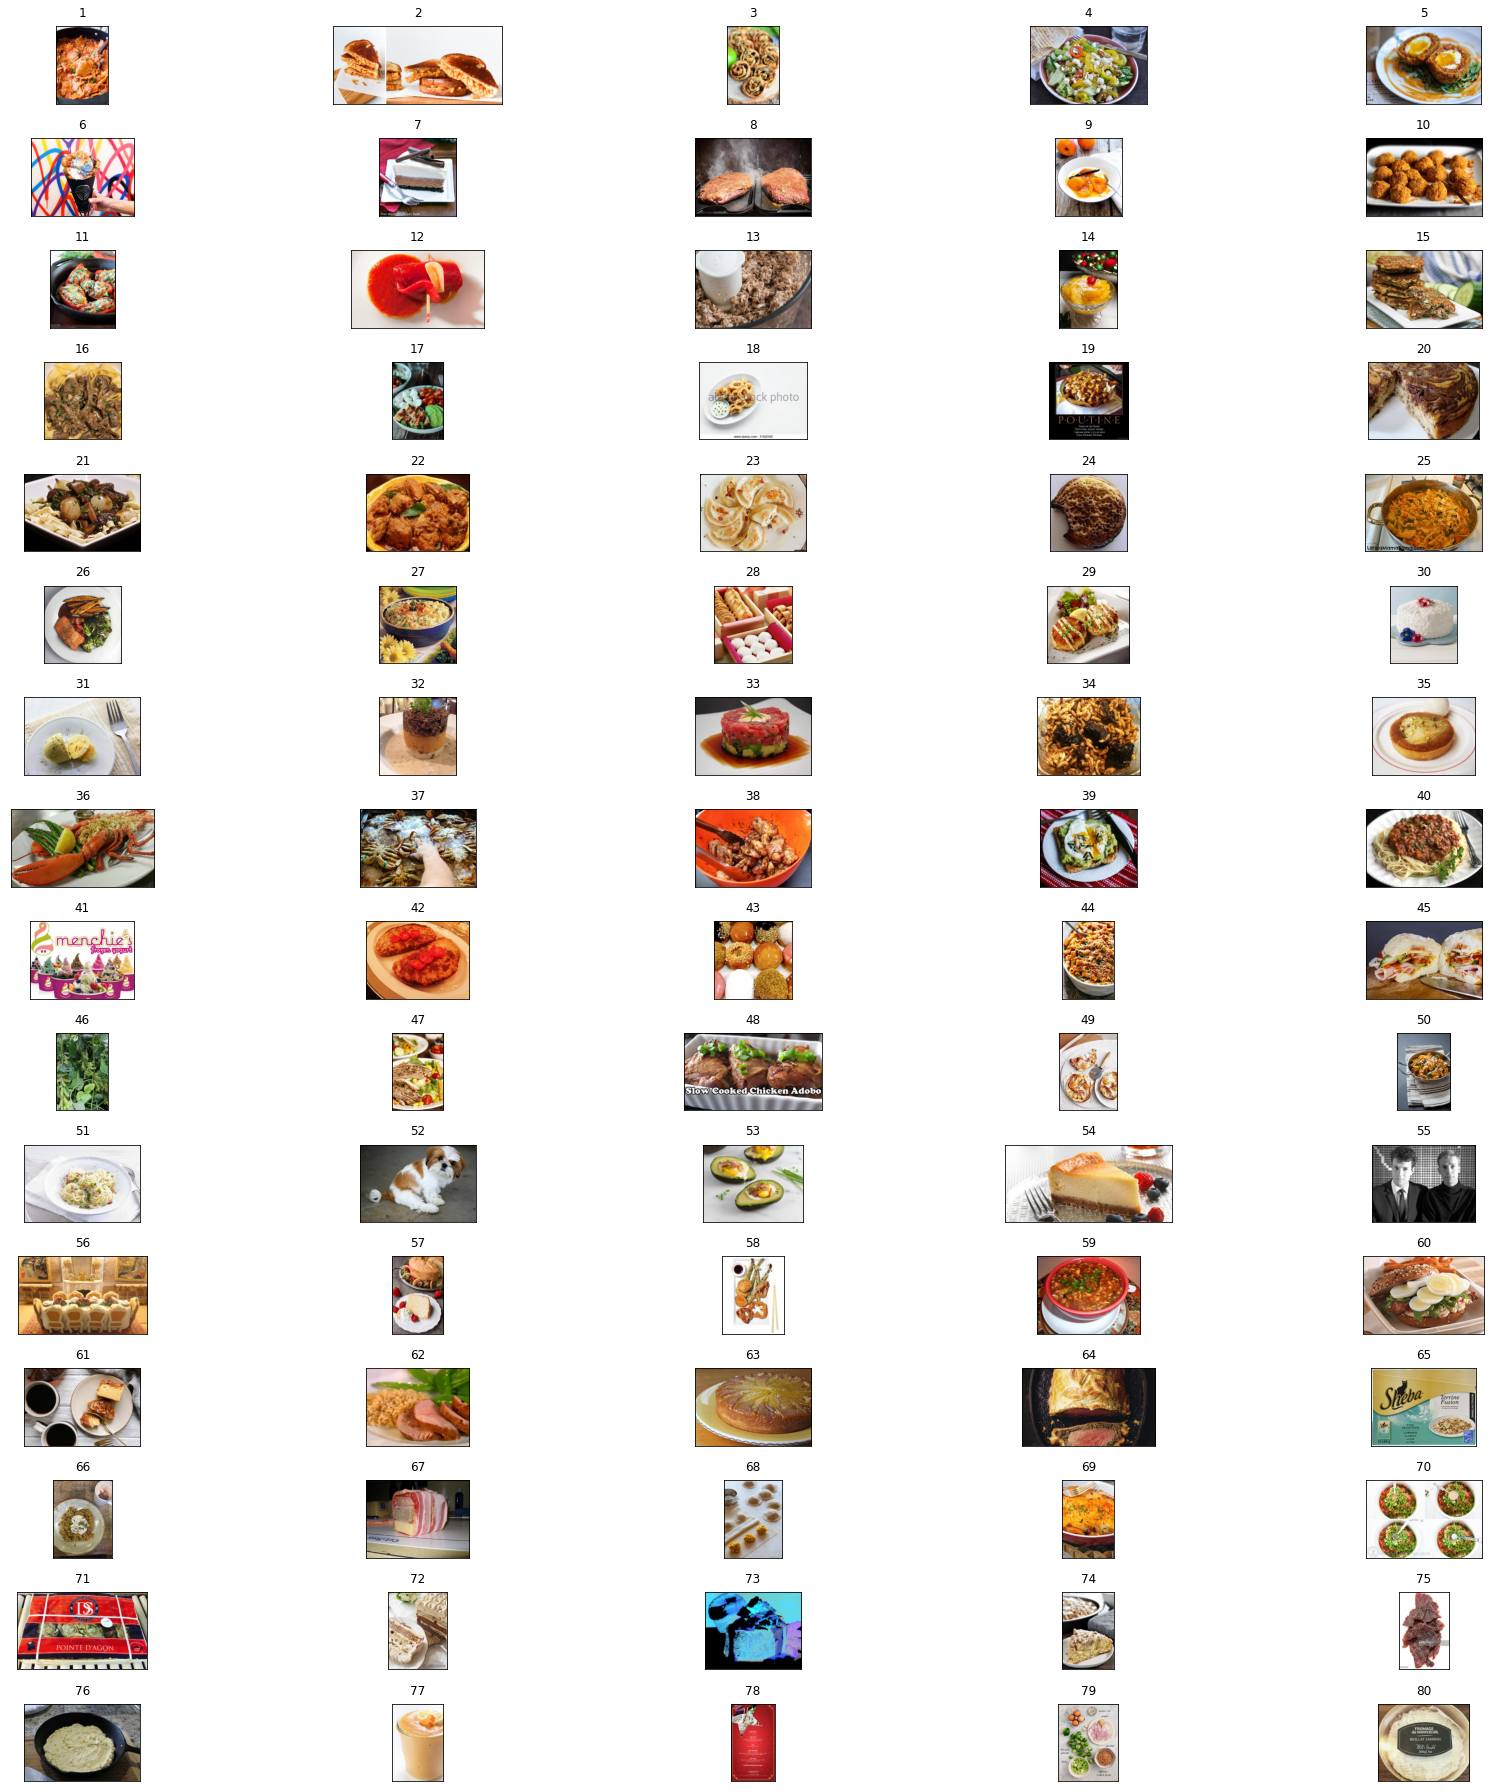

In [4]:
example_df = df_train.drop_duplicates(subset ="label", keep = "first", inplace = False)
rows = 16
cols = 5
food_id = 0
fig, ax = plt.subplots(rows, cols, figsize=(25,25))
data_loc = "train_set/train_set/"
for i in range(rows):
  for j in range(cols):
      food_id += 1
      if food_id > 80:
          continue
      loc = str(example_df.loc[example_df["label"] == food_id, "img_name"].values[0])
      img = plt.imread(os.path.join(data_loc,loc))
      ax[i][j].imshow(img)
      ax[i][j].set_title(food_id, pad = 10)
    
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()

In [40]:
import numpy as np
import skimage.io as io
from skimage.transform import rotate, AffineTransform, warp, rescale
from skimage.util import random_noise
from skimage.filters import gaussian
from scipy.ndimage.interpolation import zoom
import matplotlib.pyplot as plt
import random
from copy import deepcopy
import pandas as pd
import os

C:\Users\Rijksbaron\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0 1 0 1 0 1]


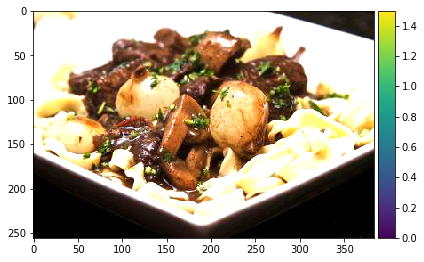

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0 0 0 1 0 0]


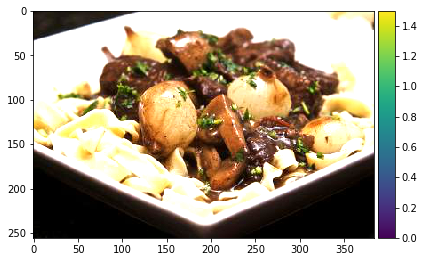

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0 1 0 0 1 0]
0.01198911687378189


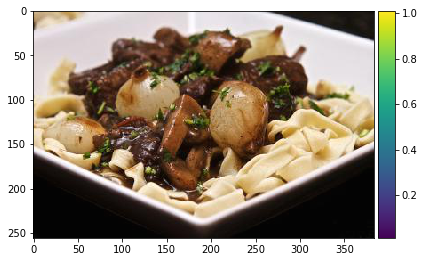

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0 0 0 1 0 0]


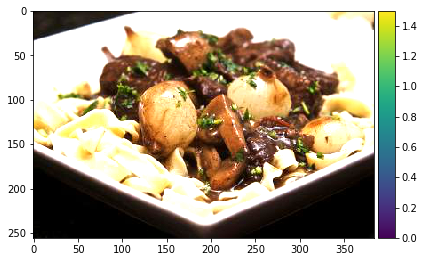

[1 0 0 0 0 1]


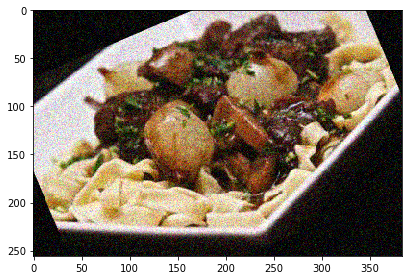

[0 0 1 0 0 0]


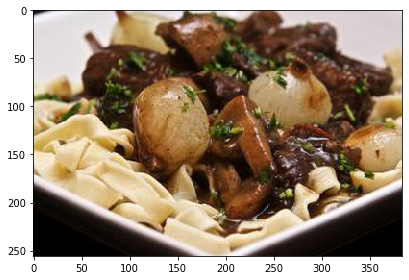

[1 0 0 1 0 0]


C:\Users\Rijksbaron\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


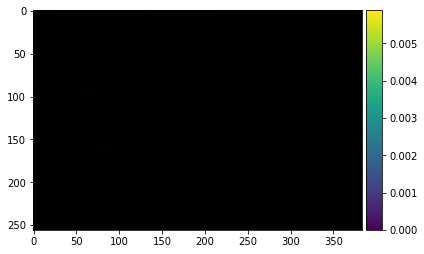

[0 0 0 0 0 0]


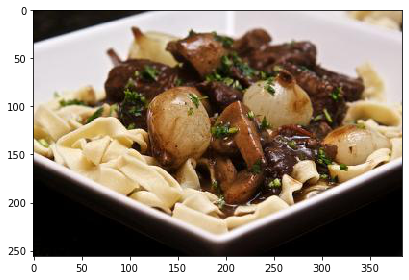

[0 0 0 0 0 1]


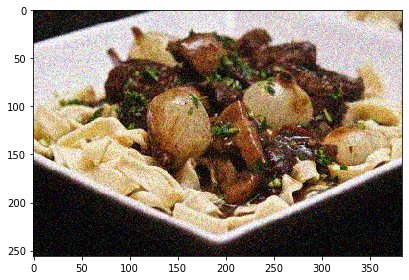

[0 0 1 0 0 1]


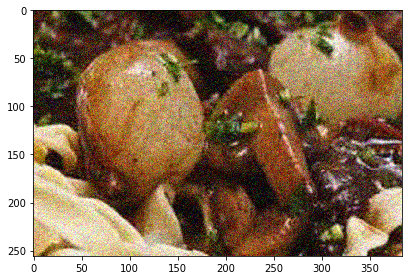

In [76]:
df_train = pd.read_csv("train_labels.csv")
data_loc = "train_set/train_set/"

for row in df_train.iterrows():
    img_loc = data_loc + row[1]["img_name"]
    img
    img_original = io.imread(img_loc)
    for i in range(10):
        img = deepcopy(img_original)
        nums = np.random.choice([0, 1], size=6, p=[.7, .3])
        print(nums)
        if nums[0] == 1:
            random_degree = random.uniform(-30, 30)
            img = rotate(img, random_degree)
        if nums[1] == 1:
            img = img[:, ::-1]
        if nums[2] == 1:
            factor = round(float(random.uniform(101, 200)/100), 1)
            img = clipped_zoom(img, factor)
        if nums[3] == 1:
            saturation = random.uniform(101, 105)/100
            img = img/255 * 1.5
        elif nums[4] == 1:
            brightness = random.uniform(0,25)/255
            print(brightness)
            img = img/255 + brightness
        elif nums[5] == 1:
            img = random_noise(img)
        io.imshow(img)
        plt.show()
    break

In [45]:
def clipped_zoom(img, zoom_factor, **kwargs):

    h, w = img.shape[:2]

    # For multichannel images we don't want to apply the zoom factor to the RGB
    # dimension, so instead we create a tuple of zoom factors, one per array
    # dimension, with 1's for any trailing dimensions after the width and height.
    zoom_tuple = (zoom_factor,) * 2 + (1,) * (img.ndim - 2)

    # Zooming out
    if zoom_factor < 1:

        # Bounding box of the zoomed-out image within the output array
        zh = int(np.round(h * zoom_factor))
        zw = int(np.round(w * zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2

        # Zero-padding
        out = np.zeros_like(img)
        out[top:top+zh, left:left+zw] = zoom(img, zoom_tuple, **kwargs)

    # Zooming in
    elif zoom_factor > 1:

        # Bounding box of the zoomed-in region within the input array
        zh = int(np.round(h / zoom_factor))
        zw = int(np.round(w / zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2

        out = zoom(img[top:top+zh, left:left+zw], zoom_tuple, **kwargs)

        # `out` might still be slightly larger than `img` due to rounding, so
        # trim off any extra pixels at the edges
        trim_top = ((out.shape[0] - h) // 2)
        trim_left = ((out.shape[1] - w) // 2)
        out = out[trim_top:trim_top+h, trim_left:trim_left+w]

    # If zoom_factor == 1, just return the input array
    else:
        out = img
    return out